In [41]:
# ASTR 400 B 
# In Class Lab 2

# Import Modules 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad # For integration
# Documentation and examples for quad : 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# https://www.tutorialspoint.com/scipy/scipy_integrate.htm

## Part A:  Schechter Fxn

The galaxy luminosity function in the nearby universe is well described by a Schechter Function:

\begin{equation}
\Phi(M)dM = ( 0.4 \, ln10 ) \, \phi_\ast \, 10^{0.4(M_\ast - M)(\alpha +1)} e^{-10^{0.4(M_\ast - M)}} dM
\end{equation}

With the following parameters from Smith+2009 for Field Galaxies in SDSS at z$\sim$0.1 in the Kband:


 $\phi_\ast$ =1.66 $  \times 10^{-2}$  $h^3$ Mpc$^{-3}$

 $\alpha$ =  -0.81 


  M$_\ast$ =  M$_k^\ast$= -23.19  - 5*log($h$) (this is absolute magnitude)
  
 $h$ = the Hubble constant in units of 100 km/s/Mpc . At z=0 this is 0.7. But we are going to se $h$=1 here. Units will then be in "comoving" coordinates.
  
  This function is defined for you below:

In [42]:
# functions start lowercase

def schechter_M(m,phi_star=0.0166,m_star=-23.19,alpha=-0.81):
    """ Function that computes the Schechter Luminosity Function for a given magnitude, 
    assuming default parameters for field galaxies in SDSS at z~0.1 in the Kband (Smith+2009)
    
    Inputs
        m : an array of floats
            an array of Kband magnitudes  (assumes -5*log(h) implicitly)
        phi_star:  float
            normalization of Schechter fxn (h^3 Mpc^-3)
        m_star:  float 
            knee of the Schechter fxn (K-band magnitude, assumes -5*log(h) implicitly)
        alpha:  float
            faint end slope of the Schechter fxn
    
    Output:
        schechterM: float
            number density of galaxies (comoving units) at the given magnitude m - 5*log(h)

    """

# You should divide up long functions instead of writing them out as one long set
    a = 0.4*np.log(10)*phi_star # Grouping all constants together
    b = 10**(0.4*(m_star-m)*(alpha+1.0)) # The Power Law, controlling the faint end slope
    c = np.exp(-10**(0.4*(m_star-m))) # The Exponential controlling the high mass end behavior
    schechterM = a*b*c # schechter function for the given magnitude
# i.e. don't do the below
#    return 0.4*np.log(10)*phistar*10**(0.4*(Mstar - M)*(alpha +1.0))*np.exp(-10**(0.4*(Mstar - M)))

    return schechterM

# Q1 

Utilizing the defined function, plot the Schechter Function using the above parameter values over a magnitude range of -17 to -26. 
Try to reproduce the black solid line in Smith+2009 MNRAS 397,868 [UKIDSS Survey] Figure below.


![Smith](./Smith09.png)

# Q2 

Galaxies in the Virgo Cluster have different parameters, like $\alpha$=-1.35  (Ferrarese+2016 ApJ 824).

(Changes the number of low mass versus high mass galaxies)

Overplot the Schechter Function with this new value of $\alpha$.  

Try a smaller value of $\alpha = -0.6$.

How does the function change?  What does this mean? 


In [43]:
# Create an array to store Kband Magnitudes from -26 to -17

mK = np.arange(-26,-16.9,0.1)

mK

array([-26. , -25.9, -25.8, -25.7, -25.6, -25.5, -25.4, -25.3, -25.2,
       -25.1, -25. , -24.9, -24.8, -24.7, -24.6, -24.5, -24.4, -24.3,
       -24.2, -24.1, -24. , -23.9, -23.8, -23.7, -23.6, -23.5, -23.4,
       -23.3, -23.2, -23.1, -23. , -22.9, -22.8, -22.7, -22.6, -22.5,
       -22.4, -22.3, -22.2, -22.1, -22. , -21.9, -21.8, -21.7, -21.6,
       -21.5, -21.4, -21.3, -21.2, -21.1, -21. , -20.9, -20.8, -20.7,
       -20.6, -20.5, -20.4, -20.3, -20.2, -20.1, -20. , -19.9, -19.8,
       -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19. , -18.9,
       -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18. ,
       -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1,
       -17. , -16.9])

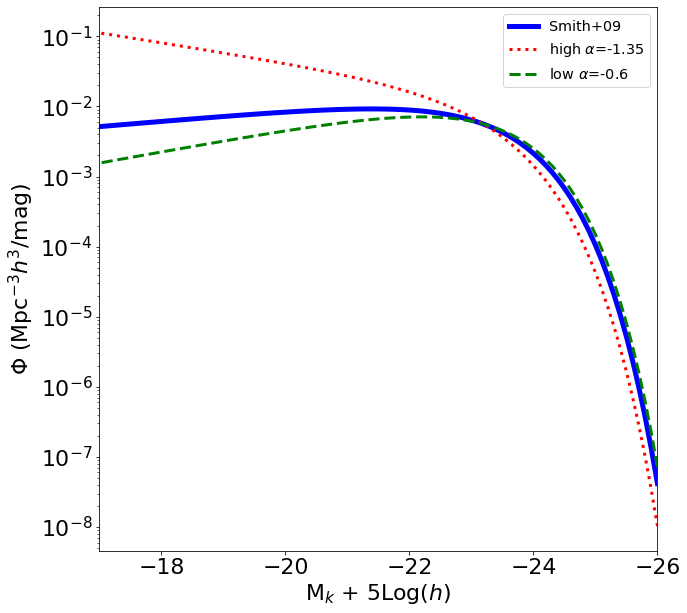

In [44]:
# Plot the Schechter Function

fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the default values (y axis log)
ax.semilogy(mK, schechter_M(mK), color='b', linewidth=5, label='Smith+09')

# Q2 solutions: change alpha
ax.semilogy(mK, schechter_M(mK, alpha=-1.35), color='r', linestyle=':',
            linewidth=3, label=r'high $\alpha$=-1.35')

ax.semilogy(mK, schechter_M(mK, alpha=-0.6), color='g', linestyle='--',
            linewidth=3, label=r'low $\alpha$=-0.6')


# Add labels
plt.xlabel(r'M$_k$ + 5Log($h$)', fontsize=22)
plt.ylabel(r'$\Phi$ (Mpc$^{-3}h^3$/mag)', fontsize=22)

#set axis limits
plt.xlim(-17,-26)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Save to a file
plt.savefig('Schechter_M.png')



# Q3

Build a function to compute the Schechter Function in terms of luminosity.

Use `quad` to numerically integrate the function to compute the fraction of the luminosity that lies above L* in the following three cases:  

$\alpha$=-0.7 (default), $\alpha$=-0.6, $\alpha$=1.85. 


Schecheter Function $\Phi(L) = \frac{n_\ast}{L_\ast} (\frac{L}{L_\ast})  ^{\alpha}  e^{-L/L_\ast}$

$n_\ast$ = 0.008  $h^3$ Mpc$^{-3}$

$L_\star = 1.4 \times 10^{10} L_\odot$

In [45]:
def schechter_L(lum, n_star=8e-3, l_star=1.4e10, alpha=-0.7):
    '''
    This function computes the schechter luminosity function for a given luminosity 
    
    defaults are from Sparke & Gallagher
    
    inputs:
        lum: array of floats
            Array of luminosities (Lsun)
            
        n_star: float
            normalization of the schechter function (h^3 Mpc^-3)
        l_star: float
            Knee of the Schechter function aka characteristic luminosity (Lsun)
        alpha: float
            faint end slope
            
    outputs:
        schechter_L: float
            number density of galaxies for a given luminosity (h^3 * Mpc^-3/Lsun)
    
    '''
    
    # break down equation into parts
    a = (lum/l_star)**alpha # faint end
    b = np.exp(-lum/l_star) # bright end
    c = n_star/l_star #constants
    
    schechter_L = a*b*c
    
    return schechter_L 
    

In [49]:
# Understanding lambda functions
# Short cut -- defines and evaluates a function in one line ! 

# lambda says that a function follows, 
# where the variables are a and b, 
# and the function to be evaluated is a*b
x = lambda a, b : a * b
print(x(5, 6))

30


In [8]:
# Example Usage of quad and lambda


# sine from 0 to pi
print(quad(np.sin, 0, np.pi))


f = lambda x: np.sin(x)
print(quad(f, 0, np.pi))
# first element quad is the integral, second element is the error


def ex(x):
    return np.sin(x) 

print(quad(lambda x: ex(x), 0, np.pi))



(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)


compute the fraction of the luminosity that lies above L* in the following three cases:

𝛼 =-0.7 (default),  𝛼 =-0.6,  𝛼 =1.85.


total amount of light
L = integral(L*$\Phi$*dL)

In [51]:
# what fraction of the integrated L density lies above L*
# alpha =-0.7
                        # function.          range
l_upper = quad(lambda L: L*schechter_L(L), 1.4e10, 1e14 )
print(l_upper)

l_total = quad(lambda L: L*schechter_L(L), .1, 1e14)
print('flux ratio for (>L*/L_tot)', np.round(l_upper[0]/l_total[0], 3))

(49678654.46727106, 0.00015538562429551206)
flux ratio for (>L*/L_tot) 0.494


half of the light is above L*

In [52]:
# what fraction of the integrated L density lies above L*
# alpha =-1
                        # function.          range
l_upper1 = quad(lambda L: L*schechter_L(L, alpha=-1), 1.4e10, 1e14 )
print(l_upper1)

l_total1 = quad(lambda L: L*schechter_L(L, alpha=-1), .1, 1e14)
print('flux ratio for (>L*/L_tot)', np.round(l_upper1[0]/l_total1[0], 3))

(41202497.41120155, 0.003042993904728064)
flux ratio for (>L*/L_tot) 0.368


changing the slope of the faint end, we put more light in the low mass end than the high mass end
which is why the ratio is lower.

In [54]:
# what fraction of the integrated L density lies above L*
# alpha =-1.85
                        # function.          range
l_upper2 = quad(lambda L: L*schechter_L(L, alpha=-1.85), 1.4e10, 1e14 )
print(l_upper2)

l_total2 = quad(lambda L: L*schechter_L(L, alpha=-1.85), .1, 1e14)
print('flux ratio for (>L*/L_tot)', np.round(l_upper2[0]/l_total2[0], 3))

(26308850.163707394, 0.04953799562082395)
flux ratio for (>L*/L_tot) 0.038


ratio got even smaller!! the knee is always the same but the drop off changes

## Part B: IMF 

Create a function called `Salpeter` that defines the Salpeter IMF: 

\begin{equation}
\xi(M) = \xi_0 (M/M_\odot)^{-\alpha}
\end{equation}

$\alpha = 2.35$
The function should take as input an array of stellar masses, M. 
You will need to determine the normalization, $\xi_0$, by integrating this equation over mass from 0.1 to 120 M$_\odot$
and setting the value to 1.  The function should then return $\xi(M)$, which will now represent the fractional number of stars. 

$\xi$=1

Integration:

`quad(lambda x:  fxn(x),xmin,xmax)`

quad returns an array with 2 values. you want the first value. 
Note I've used a "lambda" expression.   Python's lambda expressions allow a function to be created and passed around all in one line of code

In [58]:

def salpeter(m, m_min=0.1, m_max=120, alpha=2.35):
    '''
    this function defines the salpeter IMF. The function is normalizedd such that
    it returns the fraction of stars expected at the given range of masses assuming stars range from m_min
    to m_max
    
    inputs:
        m: array of floats
            array of stellar masses (Msun)
        m_min: float
            minimum mass (Msun)
        m_max:
            maximum mass (Msun)
            
        alpha: float
            the power law for the salpeter function
            
    output:
        norm_salpeter: float
            normalized fraction of stars at a given mass
    
    '''
    
    # determine the magnitude of the integral
    to_normalize = quad(lambda m: m**(-alpha), m_min, m_max)
    
    # determine the normalization factor
    norm = 1/to_normalize[0]
    
    # return the normalized salpeter IMF
    norm_salpeter = norm*m**(-alpha) # should be a number less than 1
    
    return norm_salpeter
    

## Q1: 
Double Check: if you integrate your function from 0.1 to 120 you should return 1.0 


In [63]:

Test = quad(lambda m: salpeter(m), 0.1, 120)
np.round(Test[0], 3)

1.0

## Q2: 
Integrate your normalized function to compute the fraction of stars with stellar masses greater than the sun and less 
than 120 M$_\odot$.

In [64]:
frac = quad(lambda m: salpeter(m), 1., 120)
np.round(frac[0], 3)

0.045

fraction of stars greater than the sun's mass is 0.045

In [66]:
# cluster with 5000 stars

print('number of stars in a cluster of 5000 stars', 5000*np.round(frac[0], 3))


number of stars in a cluster of 5000 stars 225.0


## Q3:

How might you modify the above to return the fraction of MASS ? instead of fraction of the total numbers of stars.

In [67]:

def salpeter_Mass(m, m_min=0.1, m_max=120, alpha=2.35):
    '''
    this function defines the salpeter IMF. The function is normalizedd such that
    it returns the fraction of total mass expected at the given range of masses assuming stars range from m_min
    to m_max
    
    inputs:
        m: array of floats
            array of stellar masses (Msun)
        m_min: float
            minimum mass (Msun)
        m_max:
            maximum mass (Msun)
            
        alpha: float
            the power law for the salpeter function
            
    output:
        norm_salpeter: float
            normalized fraction of mass over a given m range
    
    '''
    
    # determine the magnitude of the integral
    to_normalize = quad(lambda m: m*m**(-alpha), m_min, m_max)
    
    # determine the normalization factor
    norm = 1/to_normalize[0]
    
    # return the normalized salpeter IMF
    norm_salpeter = norm*m*m**(-alpha)
    
    return norm_salpeter

In [70]:
# determine the fraction of mass in stars that are more massive than the sun

frac2 = quad(lambda m: salpeter_Mass(m), 1., 120)

print(np.round(frac2[0], 3))

0.396


this tells us that less than half of the total mass of stars are more massive than the sun

In [71]:
# 5000 solar mass cluster

5000*np.round(frac2[0], 3)

1980.0